# Problem Statement:

I have used a dataset from link : https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv for creating our prediction model. This data set includes seven attributes and the data set
has splitted into two-parts : training data and testing data.For training the model, 80% of total data is used and the rest for
testing.To build a predictor model of medical insurance cost the training dataset is applied and to evaluate the regression model,
test set is used below.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Variables in Dataset

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.shape

(1338, 7)

In [5]:
print("The number of rows and columns in dataset",df.shape)
print("\nThe column headers in datset",df.columns)

The number of rows and columns in dataset (1338, 7)

The column headers in datset Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


The dataset contains 1338 rows and 7 columns .Out of which 1 is Target variable and remaining 6 are independent variables 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 4 numeric columns and 3 object datatype columns, and there is no null values present in  dataset

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

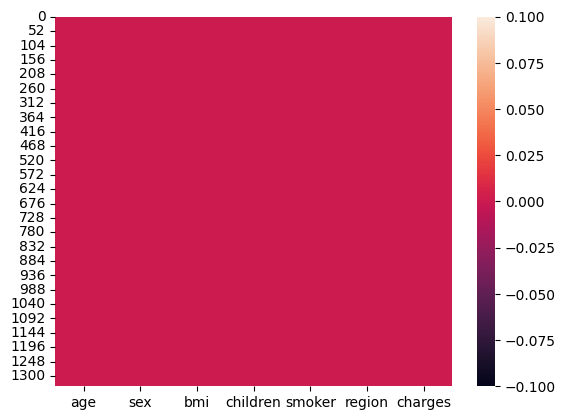

In [8]:
#Plot heatmap and check if null values are present
sns.heatmap(df.isnull())

In [9]:
#Check the count of values present in region column
df['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [10]:
#Check the count of values present in sex column
df['sex'].value_counts().sort_values()

sex
female    662
male      676
Name: count, dtype: int64

In [11]:
#Check the count of values present in smoker column
df['smoker'].value_counts().sort_values()

smoker
yes     274
no     1064
Name: count, dtype: int64

In [12]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
#Checking value_counts in each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [14]:
#Covert the categorical values into numerical values using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df[i]=le.fit_transform(df[i])

In [15]:
#Check again the dtypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [16]:
#Statistical summary
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


The counts of all the columns are same which means there are no missing values 

By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data.

We can also notice the standard deviation, minimum value,25% percentile values from this describe method.

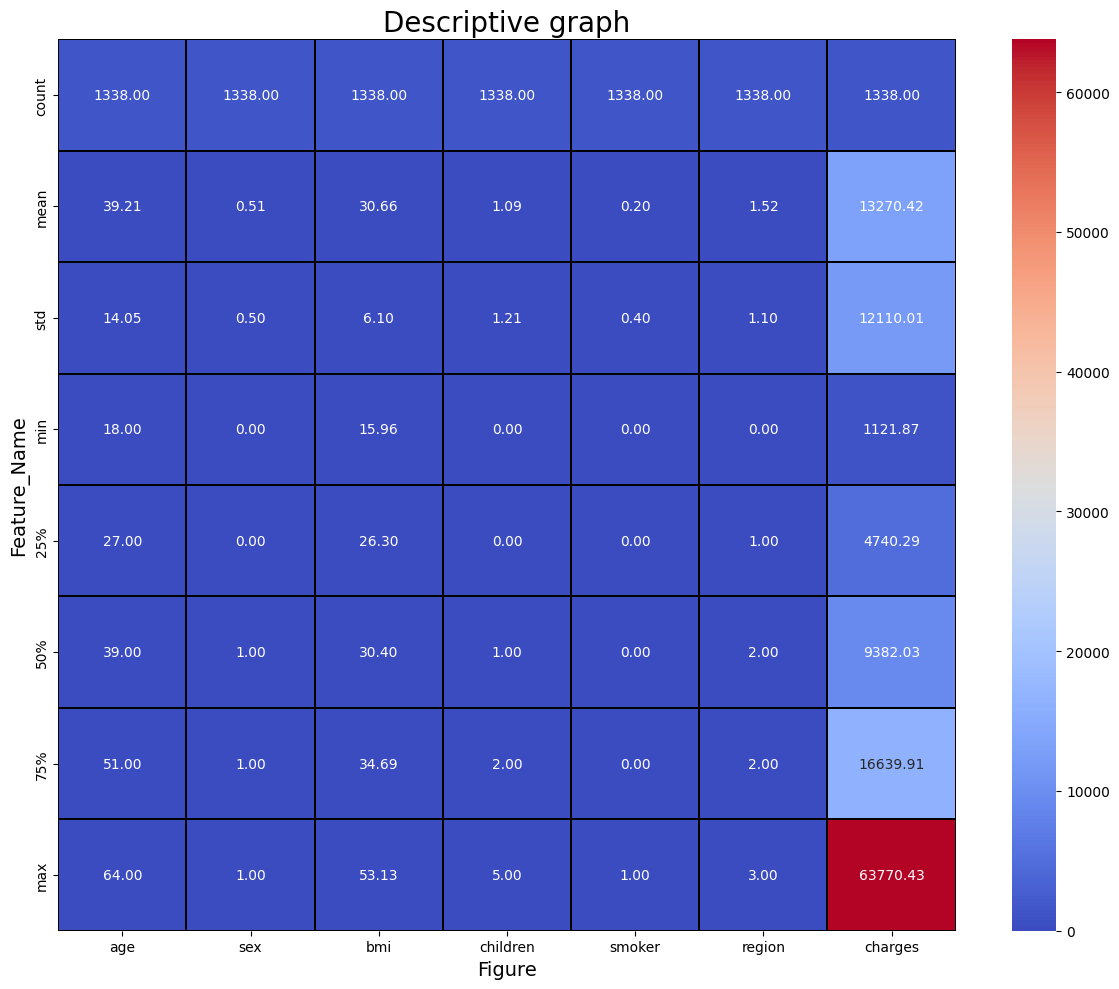

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='coolwarm')
plt.xlabel("Figure",fontsize=14)
plt.ylabel("Feature_Name",fontsize=14)
plt.title("Descriptive graph",fontsize=20)
plt.tight_layout()

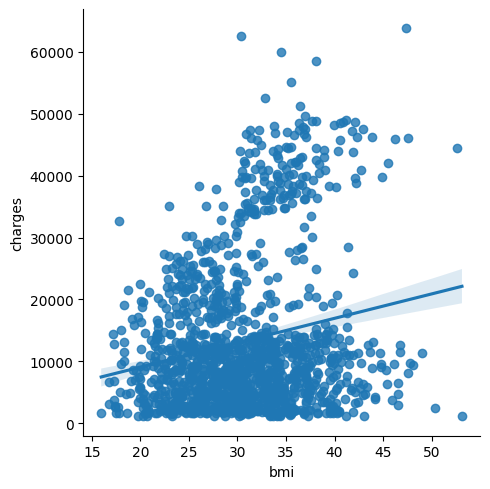

In [18]:
sns.lmplot(x='bmi',y='charges',data=df,palette='cool')
plt.show()

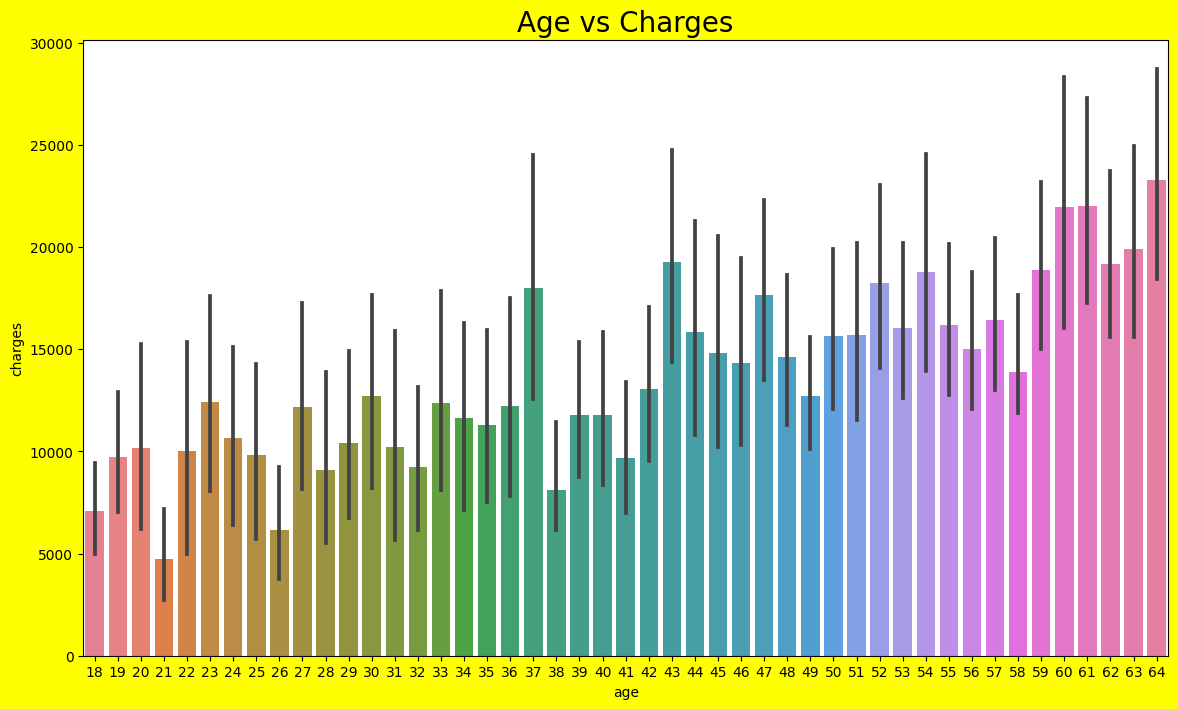

In [19]:
plt.figure(figsize=(14,8),facecolor='yellow')
plt.title("Age vs Charges",fontsize=20)
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.show()

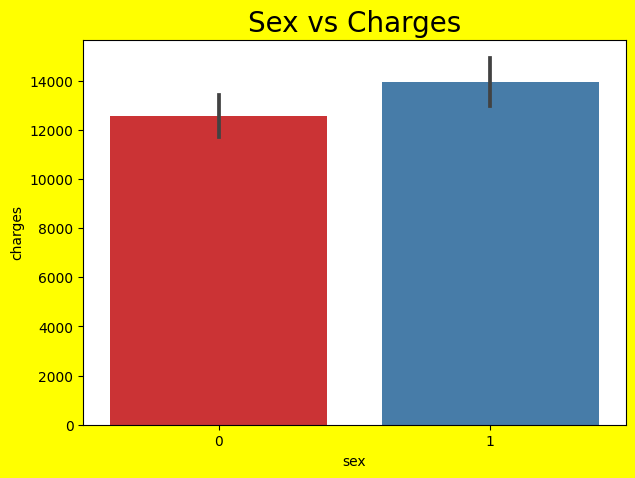

In [20]:
plt.figure(figsize=(7,5),facecolor='yellow')
plt.title("Sex vs Charges",fontsize=20)
sns.barplot(x='sex',y='charges',data=df,palette='Set1')
plt.show()

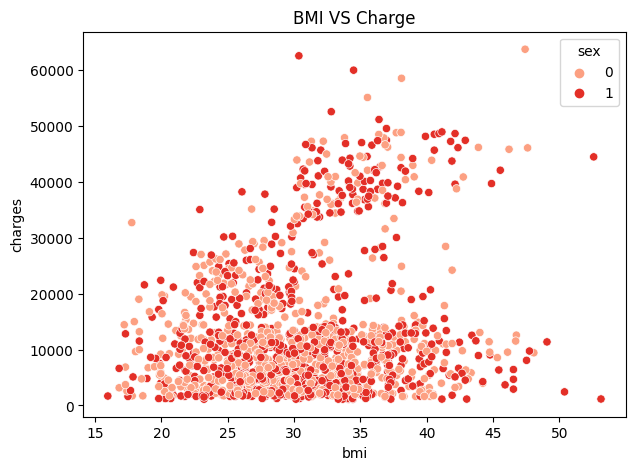

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')
plt.show()

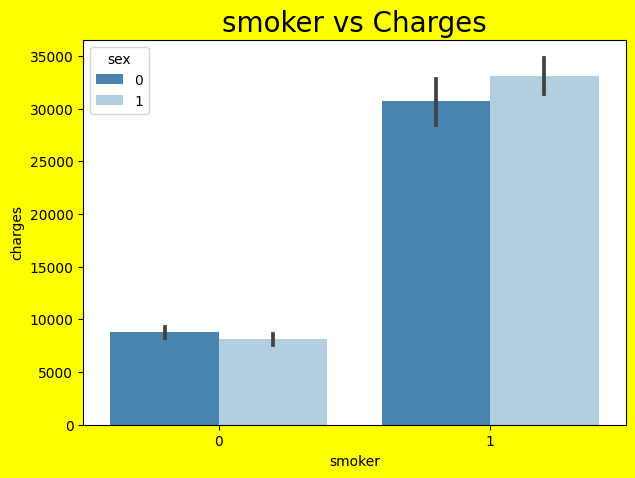

In [22]:
plt.figure(figsize=(7,5),facecolor='yellow')
plt.title("smoker vs Charges",fontsize=20)
sns.barplot(x='smoker',y='charges',data=df,hue='sex',palette='Blues_r')
plt.show()

<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

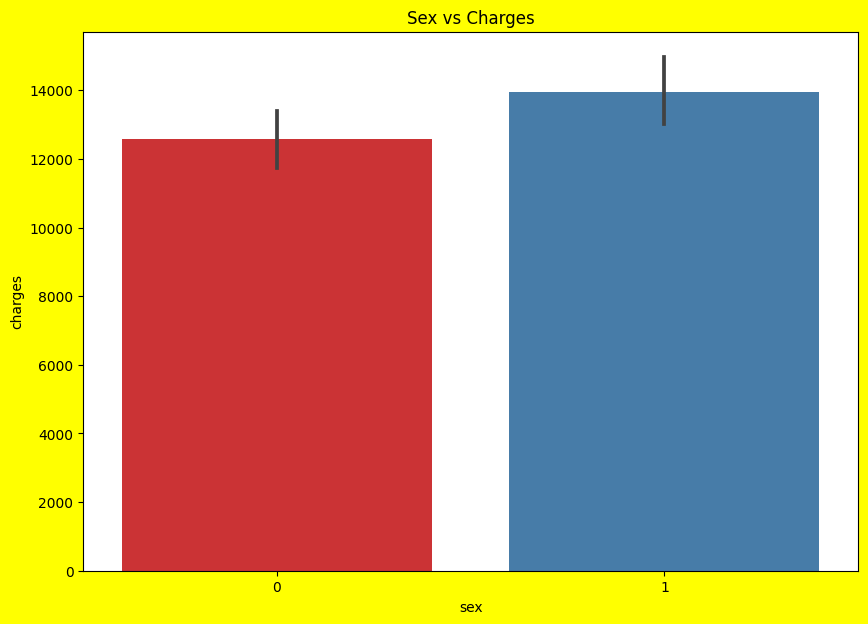

In [23]:
plt.figure(figsize=(10,7),facecolor='yellow')
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

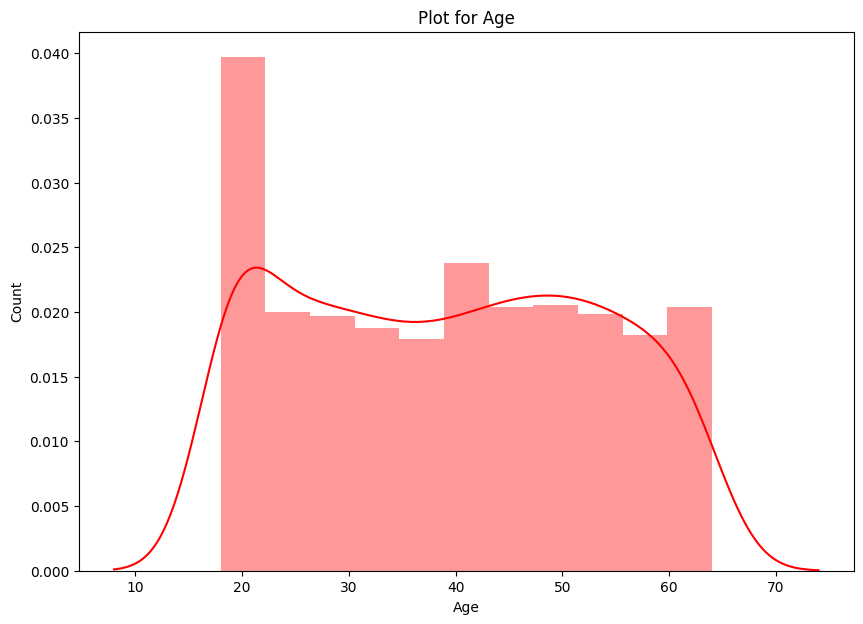

In [24]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'],color='r')
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

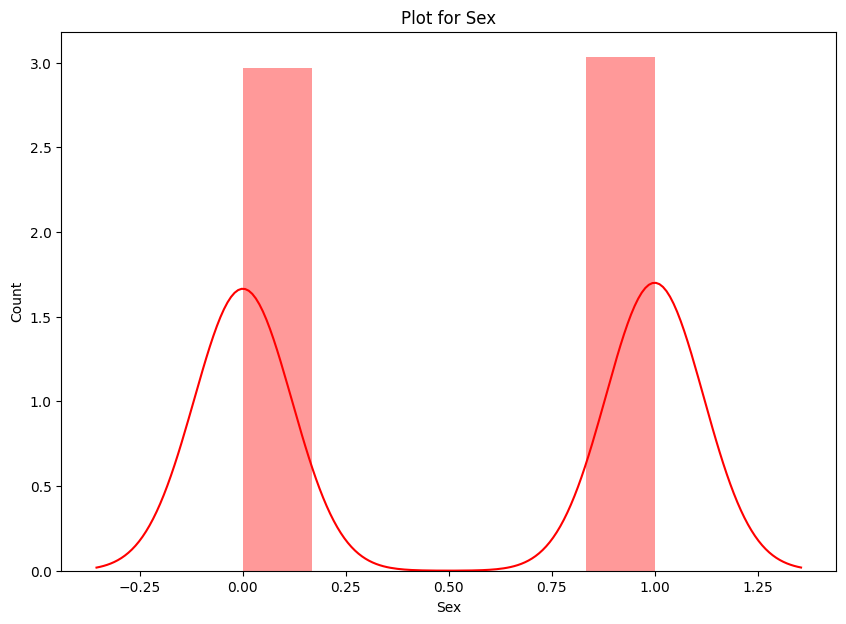

In [25]:
plt.figure(figsize=(10,7))
sns.distplot(df['sex'],color='r')
plt.title('Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

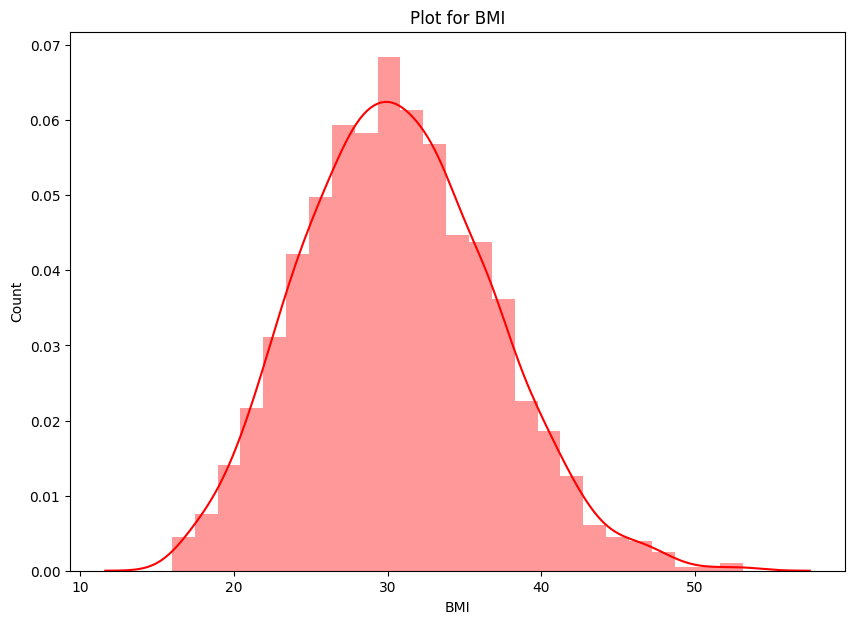

In [26]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'],color='r')
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

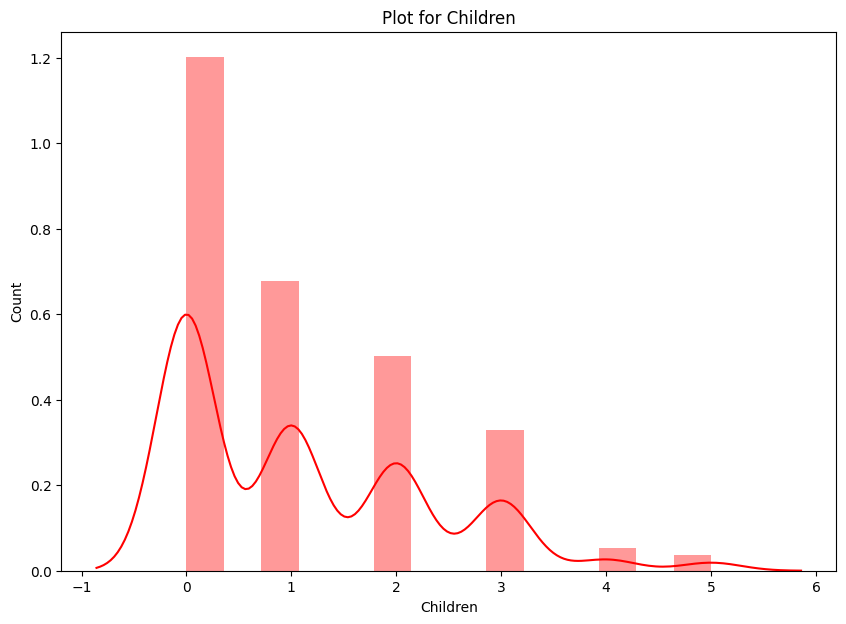

In [27]:
plt.figure(figsize=(10,7))
sns.distplot(df['children'],color='r')
plt.title('Plot for Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

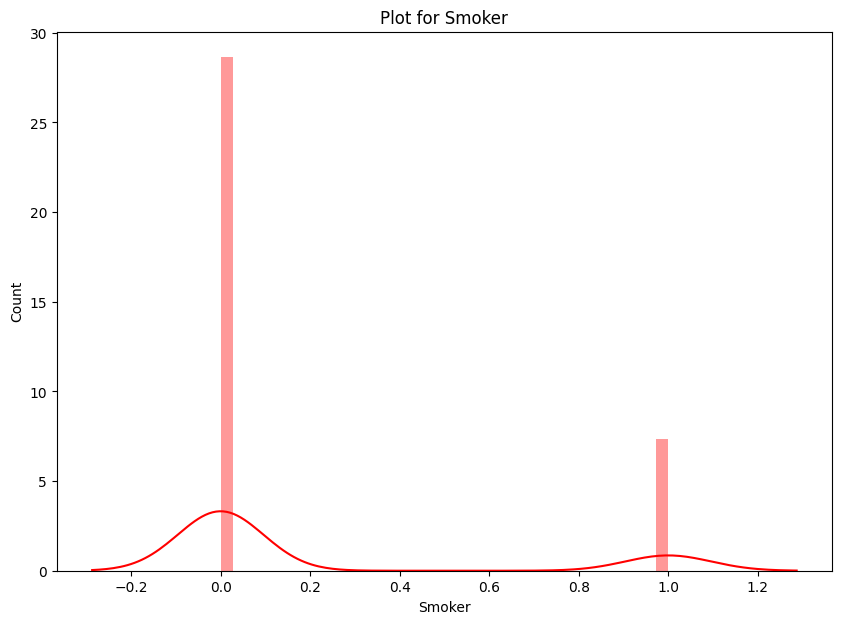

In [28]:
plt.figure(figsize=(10,7))
sns.distplot(df['smoker'],color='r')
plt.title('Plot for Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

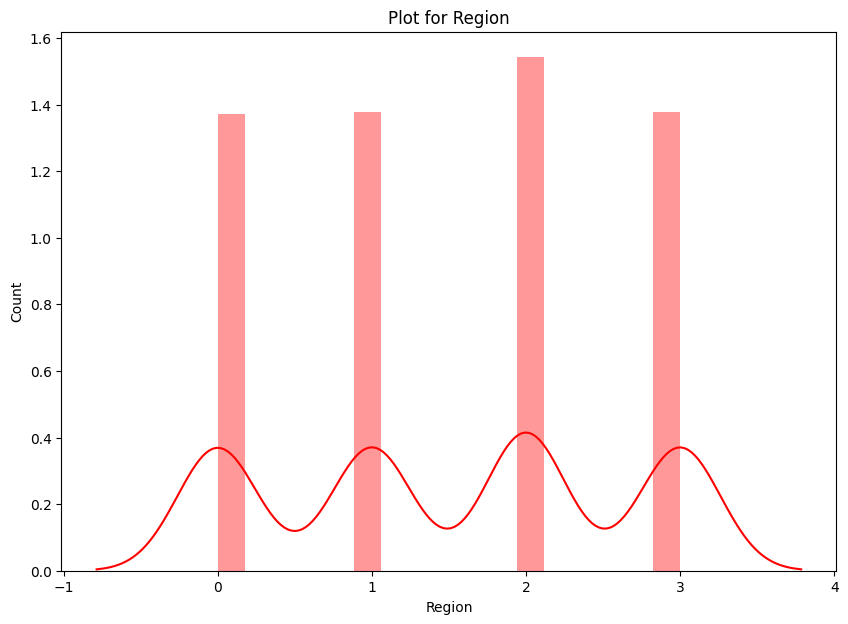

In [29]:
plt.figure(figsize=(10,7))
sns.distplot(df['region'],color='r')
plt.title('Plot for Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [30]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

As we check there is skewness in smoker column , but as smoker column is categorical no need to trim down the skewness

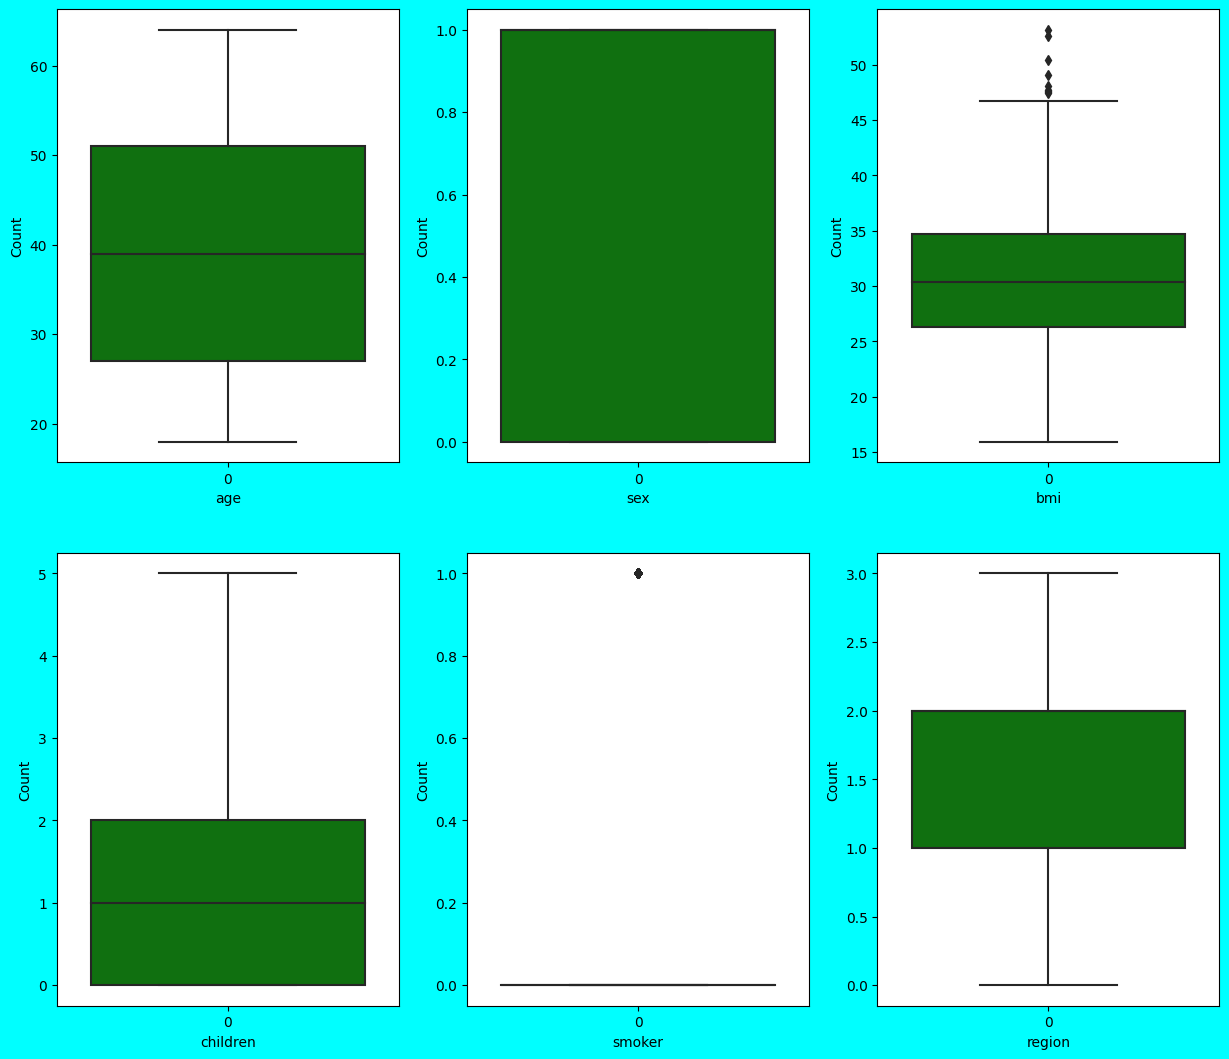

In [31]:
#Plotting box plot and check for outliers 
plt.figure(figsize=(15,20),facecolor='cyan')
figure=1
for col in df:
    if figure<=6:
        plt.subplot(3,3,figure)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col)
        plt.ylabel("Count")
    figure+=1
plt.show()

As in the above plot we can see there are outliers in BMI column

In [32]:
from scipy.stats import zscore
features=df[['age','sex','bmi','children','smoker','region']]
z=np.abs(zscore(features))
z

,age,sex,bmi,children,smoker,region
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905


In [33]:
#threshold=3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2],
      dtype=int64))


In [34]:
z.iloc[32,3]

3.240618711442044

In [35]:
#Removing data above Zscore and creating new Df

df1=df[(z<3).all(axis=1)]
df1.shape

(1316, 7)

In [36]:
print("Shape of Old DataFrame: ",df.shape[0])
print("Shape of New DataFrame: ",df1.shape[0])

Shape of Old DataFrame:  1338
Shape of New DataFrame:  1316


In [37]:
print("Data Loss Percentage: ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage:  1.6442451420029895


1.644% is the data eleiminated from zscore method

In [38]:
df=df1

In [39]:
df.shape

(1316, 7)

In [40]:
features.shape

(1338, 6)

# IQR method

In [41]:
df, features = df.align(features, axis=1, copy=False)

In [42]:
#1st Quantile
Q1=features.quantile(0.25)

#3rd Quantile
Q3=features.quantile(0.75)

IQR=Q3-Q1

df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(1041, 7)

In [43]:
print("Data Loss Percentage in IQR is : " ,((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage in IQR is :  20.89665653495441


# Data Loss percentage using IQR is 20% , so its better to use Zscore method as the percentage of data loss in zscore method is 1.644%

In [44]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [45]:
#Now we will check correlation between features using corr()
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017673,0.119062,0.058319,-0.025751,0.004741,0.299554
sex,-0.017673,1.000000,0.039934,0.015315,0.079468,0.006155,0.059243
bmi,0.119062,0.039934,1.000000,0.027706,0.004988,0.159535,0.203195
children,0.058319,0.015315,0.027706,1.000000,0.025409,-0.004830,0.090870
smoker,-0.025751,0.079468,0.004988,0.025409,1.000000,-0.001462,0.786772
region,0.004741,0.006155,0.159535,-0.004830,-0.001462,1.000000,-0.004410
charges,0.299554,0.059243,0.203195,0.090870,0.786772,-0.004410,1.000000


This gives correlation between the dependent and independent variables.we can visualize this by plotting heatmap.

<Axes: >

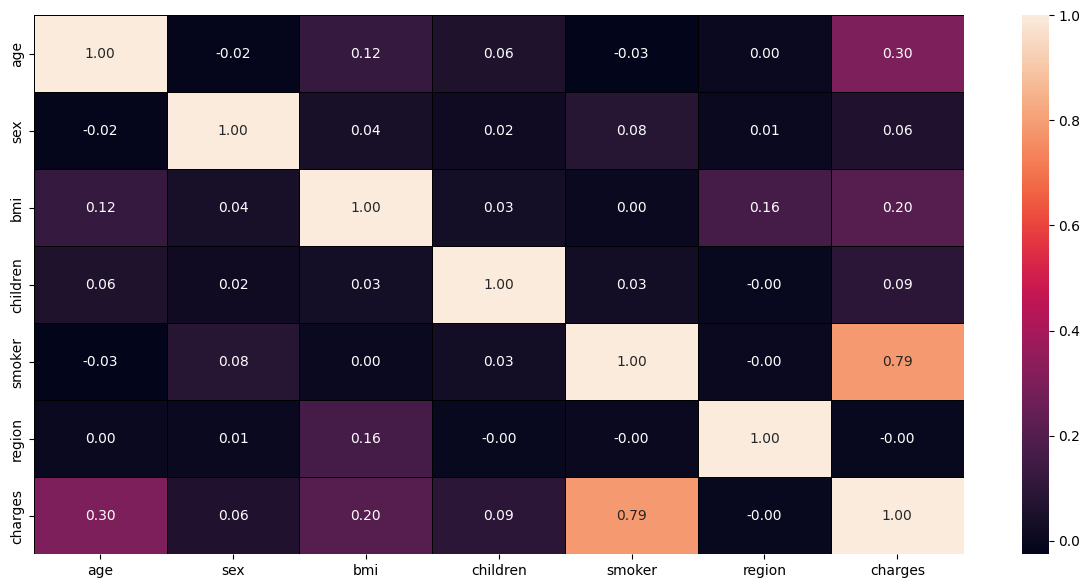

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot=True, linewidths=0.6,linecolor="black", fmt='.2f')

In [47]:
df1.corr().charges.sort_values

<bound method Series.sort_values of age         0.299554
sex         0.059243
bmi         0.203195
children    0.090870
smoker      0.786772
region     -0.004410
charges     1.000000
Name: charges, dtype: float64>

We can observe region as negative correlated feature with target feature

There is moderate negative correlation between age and sex, smoker and region , children and region  means negative correlation between features

and also there is a negative correlation between region and charges(Target variable)

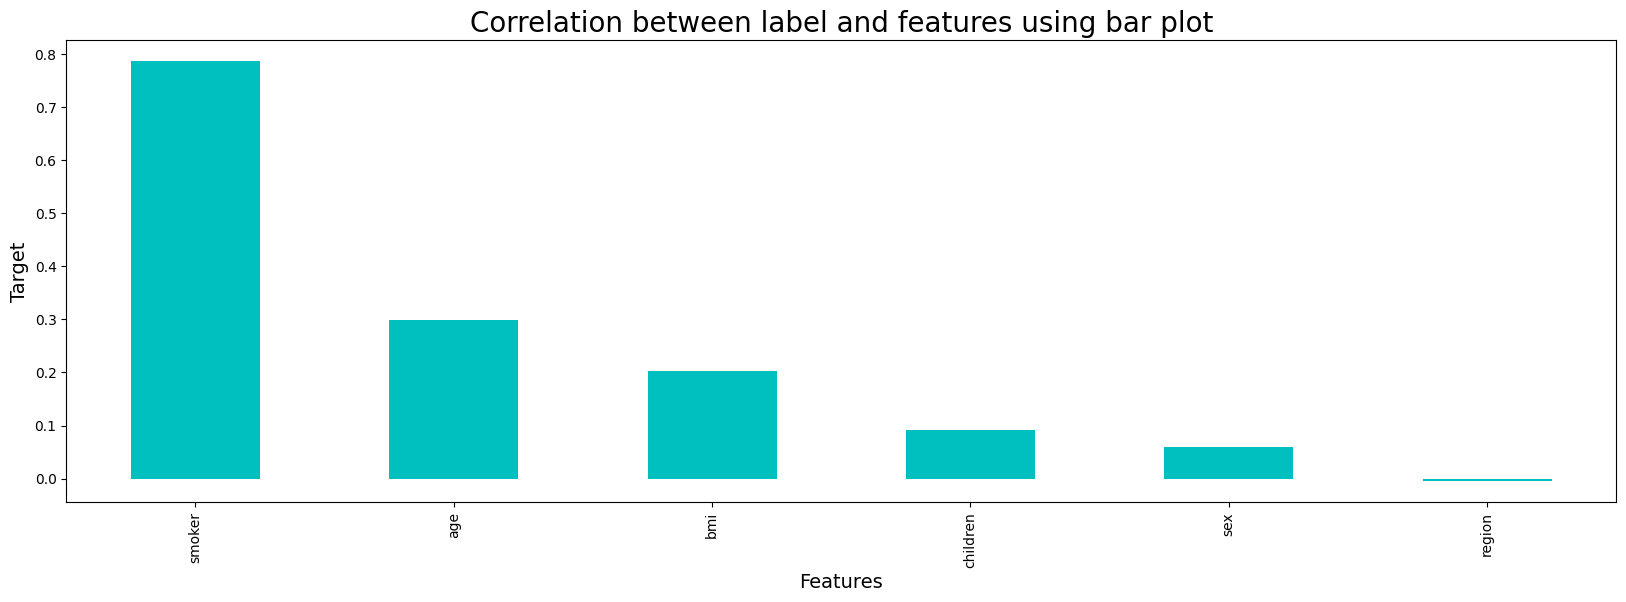

In [48]:
plt.figure(figsize=(20,6))
df1.corr().charges.sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel("Features",fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title("Correlation between label and features using bar plot",fontsize=20)
plt.show()

From the above bar plot we can notice the positive correlation between the features and target. Here the region feature has less correlation with the target column

In [49]:
#Separating the Feature and target variables
x=df1.iloc[:,:-1]
y=df1['charges']

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.441444,-1.006098,-0.453768,-0.928234,1.959141,1.352089
1,-1.512509,0.993939,0.527239,-0.038536,-0.510428,0.446568
2,-0.801858,0.993939,0.398555,1.740862,-0.510428,0.446568
3,-0.446533,0.993939,-1.321967,-0.928234,-0.510428,-0.458954
4,-0.517598,0.993939,-0.289988,-0.928234,-0.510428,-0.458954
...,...,...,...,...,...,...
1311,0.761574,0.993939,0.059297,1.740862,-0.510428,-0.458954
1312,-1.512509,-1.006098,0.218063,-0.928234,-0.510428,-1.364475
1313,-1.512509,-1.006098,1.041975,-0.928234,-0.510428,0.446568
1314,-1.299314,-1.006098,-0.804724,-0.928234,-0.510428,1.352089


We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

# Checking Variance Inflation Factor


In [51]:
#Checking Variance Inflation Factor in each colummn ie x.shape[1] (1/1-R2)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["VIF features"]=x.columns
vif

,VIF values,VIF features
0,1.018969,age
1,1.008550,sex
2,1.043397,bmi
3,1.004829,children
4,1.007649,smoker
5,1.026415,region


# Modelling

#Finding Best Random state

In [52]:
#importing necessaryu libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# Creating train test split

In [53]:
maxAccu=0
maxRs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum accuracy is ",maxAccu,"on Random State",maxRs)

Maximum accuracy is  0.8134103444681091 on Random State 109


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRs)

In [55]:
LR=LinearRegression()
RFR=RandomForestRegressor()
knn=KNeighborsRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
ABR=AdaBoostRegressor()
ETR=ExtraTreesRegressor()
lasso=Lasso()
rd=Ridge()
GBR=GradientBoostingRegressor()
model_list=[LR,RFR,knn,svr,dtr,ABR,ETR,lasso,rd,GBR]
for model in model_list:
    model.fit(x_train,y_train)
    pred_test=model.predict(x_test)
    pred_train=model.predict(x_train)
    print(model)
    print("R2 score: ",r2_score(y_test,pred_test))
    print("R2 score on training data",r2_score(y_train,pred_train))
    print("Mean Absolute Error: ",mean_absolute_error(y_test,pred_test))
    print("Mean Squared Error: ",mean_squared_error(y_test,pred_test))
    print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,pred_test)))
    print('\n')

LinearRegression()
R2 score:  0.8134103444681091
R2 score on training data 0.7304442240552681
Mean Absolute Error:  3941.728334169358
Mean Squared Error:  32463059.999546964
Root Mean Squared Error:  5697.636351992549


RandomForestRegressor()
R2 score:  0.8926217247140281
R2 score on training data 0.9730723892978567
Mean Absolute Error:  2670.788462384767
Mean Squared Error:  18681782.67074723
Root Mean Squared Error:  4322.242782485411


KNeighborsRegressor()
R2 score:  0.8849242329683806
R2 score on training data 0.8536845977698353
Mean Absolute Error:  2795.8142699757577
Mean Squared Error:  20021000.194208827
Root Mean Squared Error:  4474.483232084888


SVR()
R2 score:  -0.13224130124842737
R2 score on training data -0.09205296230115545
Mean Absolute Error:  8875.212018968266
Mean Squared Error:  196988505.02519247
Root Mean Squared Error:  14035.259350122195


DecisionTreeRegressor()
R2 score:  0.7352325703745719
R2 score on training data 0.9982341070190298
Mean Absolute Error: 

# Cross Validation Score

In [56]:
model_list=[LR,RFR,knn,svr,dtr,ABR,ETR,lasso,rd,GBR]
for model in model_list:
    score=cross_val_score(model,x,y,cv=9,scoring='r2')
    print(model)
    print(score)
    print(score.mean())
    print("Difference between R2 score and Cross validation score is ",(r2_score(y_test,pred_test)-score.mean())*100)
    print('\n')
    

LinearRegression()
[0.7585416  0.77613249 0.71027245 0.69808982 0.81545235 0.7719728
 0.65709667 0.76705405 0.75159456]
0.7451340882762917
Difference between R2 score and Cross validation score is  16.811773417327114


RandomForestRegressor()
[0.8447147  0.87832423 0.79263725 0.76757263 0.86685315 0.88788614
 0.76220251 0.86295043 0.85849632]
0.8357374843732679
Difference between R2 score and Cross validation score is  7.751433807629493


KNeighborsRegressor()
[0.83268892 0.84101516 0.76843235 0.74571771 0.86517537 0.81914706
 0.76163351 0.84706252 0.80338717]
0.8093621970931475
Difference between R2 score and Cross validation score is  10.388962535641532


SVR()
[-0.121831   -0.10486832 -0.12399814 -0.05265607 -0.1096713  -0.05335343
 -0.11936283 -0.12331819 -0.09000095]
-0.09989558175784424
Difference between R2 score and Cross validation score is  101.31474042074072


DecisionTreeRegressor()
[0.72266887 0.75483409 0.62242648 0.55148496 0.68185068 0.73228321
 0.5606904  0.68912998 0.

From the difference of both R2 score and Cross Validation Score computed on R2 score we can conclude that Gradient Boosting Regressor as our best fitting and best

performing model

# Hyper Parameter tuning

In [57]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param = {
    'n_estimators': [30,50,60],
    'max_depth': [10, 20, 40, 60, 80],
    'min_samples_leaf': [5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ["sqrt", "log2"]  
}

# Create the GridSearchCV object
GCV = GridSearchCV(GradientBoostingRegressor(), param, cv=5)

# Fit the GridSearchCV on the training data
GCV.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [58]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 30,
 'min_samples_split': 20,
 'n_estimators': 60}

In [61]:
Best_model=GradientBoostingRegressor(n_estimators = 50,criterion = 'friedman_mse', max_depth=10 , max_features = 'sqrt',min_samples_leaf = 30, min_samples_split = 20)
Best_model.fit(x_train,y_train)
predrf=Best_model.predict(x_test)
acc=r2_score(y_test,predrf)
print(acc*100)

91.1259084721359


In [ ]:
# Now after putting manual tuning I got accuarcy around 91.125 percentage. So I will save this model

In [62]:
import joblib
joblib.dump(Best_model,"Best_Medical_Cost_Insurance.obj")

['Best_Medical_Cost_Insurance.obj']

In [63]:
model = joblib.load("Best_Medical_Cost_Insurance.obj")
print(model.predict(x_test))

[20140.69214658  6747.73219532 45713.03360451  7754.15638198
  6880.66230966 11776.93414501  4686.93970026 40537.83808506
  9124.9802589  14849.24925407  8672.1144161   3360.9429536
  8188.1042031  11186.48629002 11361.49215579 43278.75983094
 42102.09913332 17227.21132031 13876.1128662   3358.74638271
  5387.07255651 10309.35799892  1796.27745947 12781.41092413
 14820.67365147 11917.54862699 14393.79107816 18085.36102499
  6115.00181429 22926.42898992 11902.36097534 15832.84509721
  6523.94227439 12449.30814443  9024.21392352  7953.7930095
 25871.45988608 44321.73605686 11995.78787643  8876.21784248
  3206.2495368   8021.55084927  3933.57957904  9976.63296375
  3983.34912074  8468.1563332  44155.24540002 10341.0830219
 14192.30883061  3637.01627775 44171.10260887  6203.17656302
 13884.99974533  7225.88859186 14647.90732746  5440.64529017
  9751.18916747  5641.7979541   9369.98189187 10072.81925181
  4257.00713564  1417.0854484  11377.72978381  5721.50069125
 10474.69898503 10237.44790

In [64]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,18608.26200,20140.692147
1,4889.99950,6747.732195
2,42211.13820,45713.033605
3,6250.43500,7754.156382
4,5028.14660,6880.662310
...,...,...
259,5708.86700,6384.205837
260,45863.20500,42563.458679
261,41676.08110,45728.977133
262,3861.20965,5075.917054


In [66]:
df_con.tail(20)

,orginal,predicted
244,8825.08600,9239.792541
245,27941.28758,16269.750962
246,8603.82340,12049.445465
247,43943.87610,35840.144116
248,4350.51440,4546.748433
249,3410.32400,5485.396730
250,10156.78320,11861.722255
251,37484.44930,39373.569903
252,2867.11960,3586.417442
253,4877.98105,6684.499076


# So predicated and original value match up to 91.125 percent.